In [3]:
%matplotlib inline
import shap
shap.initjs()

train_x, train_y = shap.datasets.boston()

from sklearn.model_selection import train_test_split
tr_x, val_x, tr_y, val_y = train_test_split(train_x, train_y, shuffle=True, random_state=42)

import lightgbm as lgb
lgb_train = lgb.Dataset(tr_x, tr_y)
lgb_val = lgb.Dataset(val_x, val_y, reference=lgb_train)

lgbm_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbose': -1,
}
booster = lgb.train(lgbm_params,
                    lgb_train,
                    valid_sets=lgb_val,
                    num_boost_round=1000,
                    early_stopping_rounds=100,
                    verbose_eval=50,
                    )



Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 3.41701
[100]	valid_0's rmse: 3.30722
[150]	valid_0's rmse: 3.24115
[200]	valid_0's rmse: 3.22073
[250]	valid_0's rmse: 3.2121
[300]	valid_0's rmse: 3.21216
[350]	valid_0's rmse: 3.21811
Early stopping, best iteration is:
[271]	valid_0's rmse: 3.20437


In [5]:
# ここからは学習したモデルが、どのように推論をするのか SHAP を使って解釈していく。 決定木系のモデルを解釈するためには shap.TreeExplainer というクラスを使おう。
# モデルと学習に使ったデータを渡してオブジェクトを作る。
explainer = shap.TreeExplainer(booster, data=tr_x)

In [7]:

# そして、TreeExplainer を使って、モデルがどのように推論するか解釈したいデータについて SHAP Value を計算しよう。
# この SHAP Value は、入力したのと同じ次元と要素数で得られる。 そして、値が大きいほど推論において影響が大きいと見なすことができる。
tr_x_shap_values = explainer.shap_values(tr_x)

 97%|=================== | 367/379 [00:11<00:00]       

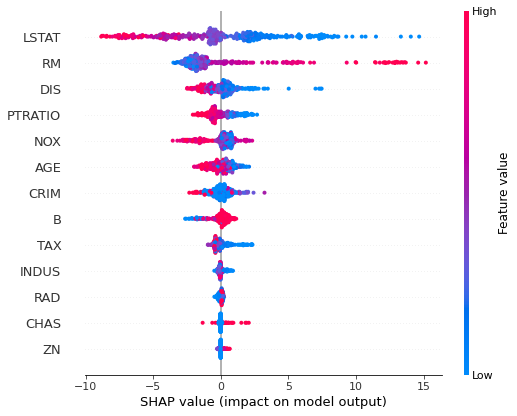

In [9]:
# つまり、行方向に見れば「特定の予測に、それぞれの特徴量がどれくらい寄与したか」と解釈できる。 
# 同様に、列方向に見れば「予測全体で、その特徴量がどれくらい寄与したか」と解釈できる。

# SHAP Value は自分で可視化しても良いけど、組み込みでいくつかグラフを描画する仕組みが用意されている。 ここからは、それらを使い分けなどと共に見ていこう。
# Summary Plot
# はじめに、Summary Plot から。 このグラフは、デフォルトでは特徴量ごとに SHAP Value を一軸の散布図として描画する。

shap.summary_plot(shap_values=tr_x_shap_values,
                  features=tr_x,
                  feature_names=tr_x.columns)